In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# XGBOOSTING


## Titanic DF

https://www.kaggle.com/competitions/titanic/data

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [4]:
titanic = pd.read_csv(r'bases\titanic.csv')
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,N,3,male,22.000000,1,0,7.2500,S
1,Y,1,female,38.000000,1,0,71.2833,C
2,Y,3,female,26.000000,0,0,7.9250,S
3,Y,1,female,35.000000,1,0,53.1000,S
4,N,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,N,2,male,27.000000,0,0,13.0000,S
887,Y,1,female,19.000000,0,0,30.0000,S
888,N,3,female,29.699118,1,2,23.4500,S
889,Y,1,male,26.000000,0,0,30.0000,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [10]:
titanic['Pclass'] = titanic['Pclass'].astype('str')

In [11]:
titanic_dummie = pd.get_dummies(titanic, drop_first=True)
titanic_dummie

,Age,SibSp,Parch,Fare,Survived_Y,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,0,0,1,1,0,1
1,38.000000,1,0,71.2833,1,0,0,0,0,0
2,26.000000,0,0,7.9250,1,0,1,0,0,1
3,35.000000,1,0,53.1000,1,0,0,0,0,1
4,35.000000,0,0,8.0500,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,1,0,1
887,19.000000,0,0,30.0000,1,0,0,0,0,1
888,29.699118,1,2,23.4500,0,0,1,0,0,1
889,26.000000,0,0,30.0000,1,0,0,1,0,0


## Separando Base Treino e Teste

In [16]:
from sklearn.model_selection import train_test_split # to split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(titanic_dummie.drop('Survived_Y', axis=1), 
                                                    titanic_dummie['Survived_Y'], 
                                                    random_state=2360873, 
                                                    test_size=0.20)

In [17]:
len(X_train), len(X_test)

(712, 179)

## Aplicando XGradient Boosting

Documentação: https://xgboost.readthedocs.io/en/stable/

XGBoost Classifier: https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

GridSeachCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [39]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


# Definir os parâmetros que serão otimizados
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3],
    'gamma': [0],
    'learning_rate': [0.1, 0.4], # ETA
    'colsample_bytree': [0.6, 0.8],
    'min_child_weight': [1],
    'subsample': [0.75, 1.0]
    
}


# Criar o classificador XGBoost
xgb_classifier = xgb.XGBClassifier()

# Criar o objeto GridSearchCV para realizar a busca em grade
grid_search = GridSearchCV(estimator=xgb_classifier, 
                           param_grid=param_grid, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=0)

# Realizar a busca em grade nos dados de treinamento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8], 'gamma': [0],
                         'learning_rate': [0.1, 0.4], 'max_depth': [2, 3],
                         'min_child_weight': [1],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.75, 1.0]})

In [40]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.75}

In [45]:
grid_search.best_score_

0.8454420970266041

In [41]:
# Criando as Previsões
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

## Avaliando o Modelo

### Base Treino

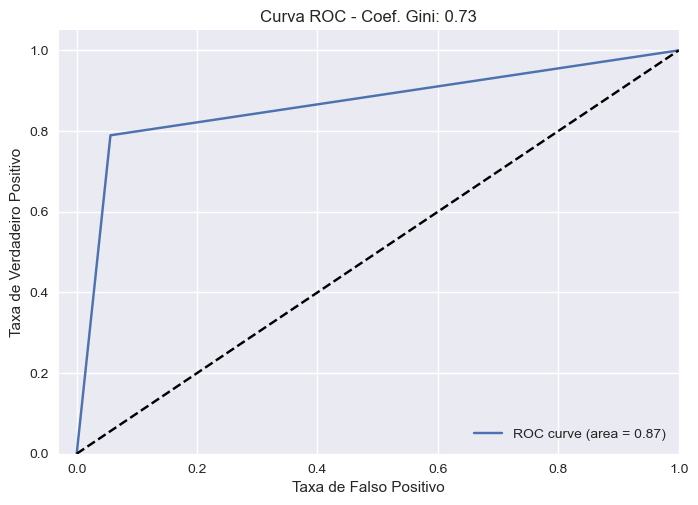

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.style.use('seaborn')

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = roc_auc_score(y_train, y_pred_train)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

### Base Teste

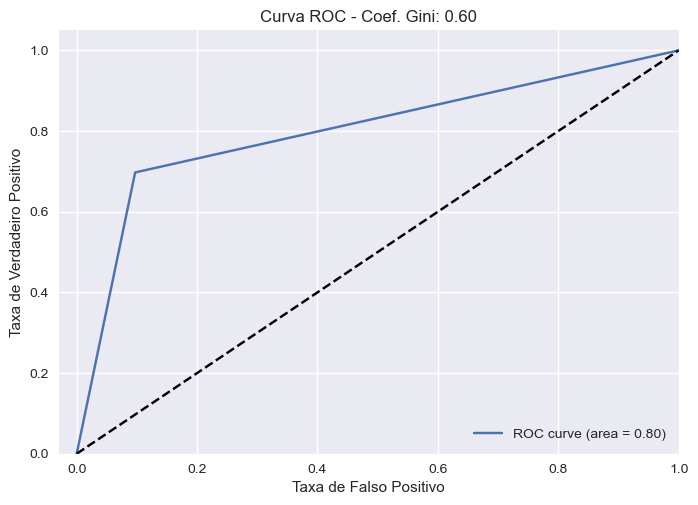

In [43]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()